In [39]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_21.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

#e1 = (data_3.to_numpy()[:, 0] < 70)
arr = data_3.to_numpy()#[e1]
print(data_3.to_numpy())#[e1])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[0.00000e+00 8.46000e-02]
 [6.40000e-02 8.44000e-02]
 [1.28000e-01 8.38000e-02]
 [1.92000e-01 8.31000e-02]
 [2.56000e-01 8.28000e-02]
 [3.20000e-01 8.24000e-02]
 [3.84000e-01 8.24000e-02]
 [4.48000e-01 8.22000e-02]
 [5.44000e-01 8.19000e-02]
 [6.08000e-01 8.21000e-02]
 [6.72000e-01 8.24000e-02]
 [7.36000e-01 8.24000e-02]
 [8.00000e-01 8.25000e-02]
 [8.64000e-01 8.31000e-02]
 [9.28000e-01 8.46000e-02]
 [9.92000e-01 8.65000e-02]
 [1.05600e+00 8.95000e-02]
 [1.12000e+00 9.21000e-02]
 [1.18400e+00 9.34000e-02]
 [1.24800e+00 9.33000e-02]
 [1.34400e+00 9.12000e-02]
 [1.40800e+00 8.86000e-02]
 [1.47200e+00 8.65000e-02]
 [1.53600e+00 8.42000e-02]
 [1.60000e+00 8.35000e-02]
 [1.66400e+00 8.37000e-02]
 [1.72800e+00 8.34000e-02]
 [1.79200e+00 8.38000e-02]
 [1.85600e+00 8.34000e-02]
 [1.92000e+00 8.29000e-02]
 [1.98400e+00 8.27000e-02]
 [2.04800e+00 8.28000e-02]
 [2.14400e+00 8.29000e-02]
 [2.20800e+00 8.25000e-02]
 [2.27200e+00 8.29000e-02]
 [2.33600e+00 8.33000e-02]
 [2.40000e+00 8.36000e-02]
 

list

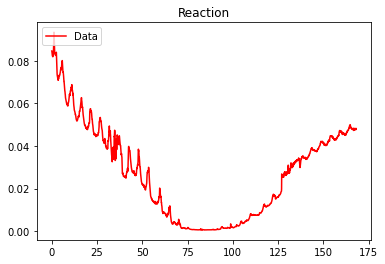

0.0934
The x-value with maximum y-value is : 2.3375000000000004


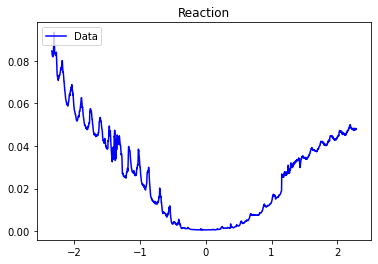

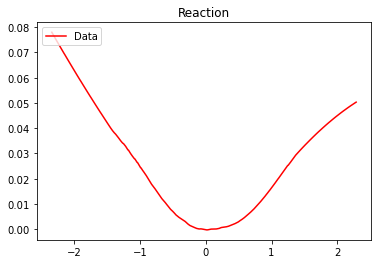

In [40]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 1001, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 40/1.1
res = 85
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Open(x,c,d):
    return c*(1 - (d/(1 + x**2)))
popt, pcov = curve_fit(Open, (x-res)/toc, yfi)


In [42]:
from pylab import *
fit_c = popt[0]
fit_d = popt[1]
err_c = sqrt(pcov[0][0])
err_d = sqrt(pcov[1][1])
print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))

The best fit for c is: 0.06337132336957438
The best fit for d is: 1.129419424625748
The error for c is: 0.0003393017046466712
The error for d is: 0.004973276909349398


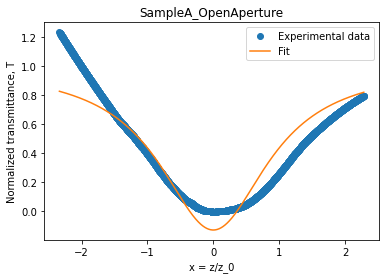

In [43]:
fit_y = Open((x-res)/toc, fit_c, fit_d)
plt.title('SampleA_OpenAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()